In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
player_stats = pd.read_csv("stats.txt",sep=',',header=None,names=['Rk','Player','Pos','Age','Tm','G','GS','MP','FG','FGA','FG%','3P','3PA',
                                                                  '3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST',
                                                                  'STL','BLK','TOV','PF','PTS'])

In [2]:
player_stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,283,478,...,0.582,207,376,583,146,51,67,94,122,684
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,440,790,...,0.691,176,559,735,368,82,93,204,182,1146
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,391,793,...,0.827,103,289,392,129,36,87,74,128,1001
3,4,Kyle Alexander\alexaky01,C,23,MIA,2,0,13,1,2,...,NaN,2,1,3,0,0,0,1,1,2
4,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,98,266,...,0.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young\youngtr01,PG,21,ATL,60,60,2120,546,1249,...,0.860,32,223,255,560,65,8,289,104,1778
647,526,Cody Zeller\zelleco01,C,27,CHO,58,39,1341,251,479,...,0.682,160,251,411,88,40,25,75,140,642
648,527,Tyler Zeller\zellety01,C,30,SAS,2,0,4,1,4,...,NaN,3,1,4,0,0,0,0,0,2
649,528,Ante Žižić\zizican01,C,23,CLE,22,0,221,41,72,...,0.737,18,48,66,6,7,5,10,27,96


In [3]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      651 non-null    int64  
 1   Player  651 non-null    object 
 2   Pos     651 non-null    object 
 3   Age     651 non-null    int64  
 4   Tm      651 non-null    object 
 5   G       651 non-null    int64  
 6   GS      651 non-null    int64  
 7   MP      651 non-null    int64  
 8   FG      651 non-null    int64  
 9   FGA     651 non-null    int64  
 10  FG%     649 non-null    float64
 11  3P      651 non-null    int64  
 12  3PA     651 non-null    int64  
 13  3P%     616 non-null    float64
 14  2P      651 non-null    int64  
 15  2PA     651 non-null    int64  
 16  2P%     645 non-null    float64
 17  eFG%    649 non-null    float64
 18  FT      651 non-null    int64  
 19  FTA     651 non-null    int64  
 20  FT%     618 non-null    float64
 21  ORB     651 non-null    int64  
 22  DR

In [4]:
# # Clean Player column so that it is only the name of the player
players = player_stats['Player'].str.split('\\')
players = players.tolist()
just_players = []
for player in players:
    just_players.append(player[0])
player_stats['Players'] = just_players
player_stats = player_stats.drop(['Player'], axis=1)
player_stats

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Players
0,1,C,26,OKC,63,63,1680,283,478,0.592,...,207,376,583,146,51,67,94,122,684,Steven Adams
1,2,PF,22,MIA,72,72,2417,440,790,0.557,...,176,559,735,368,82,93,204,182,1146,Bam Adebayo
2,3,C,34,SAS,53,53,1754,391,793,0.493,...,103,289,392,129,36,87,74,128,1001,LaMarcus Aldridge
3,4,C,23,MIA,2,0,13,1,2,0.500,...,2,1,3,0,0,0,1,1,2,Kyle Alexander
4,5,SG,21,NOP,47,1,591,98,266,0.368,...,9,75,84,89,17,8,54,57,267,Nickeil Alexander-Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,PG,21,ATL,60,60,2120,546,1249,0.437,...,32,223,255,560,65,8,289,104,1778,Trae Young
647,526,C,27,CHO,58,39,1341,251,479,0.524,...,160,251,411,88,40,25,75,140,642,Cody Zeller
648,527,C,30,SAS,2,0,4,1,4,0.250,...,3,1,4,0,0,0,0,0,2,Tyler Zeller
649,528,C,23,CLE,22,0,221,41,72,0.569,...,18,48,66,6,7,5,10,27,96,Ante Žižić


In [5]:
first_col = player_stats.pop("Players")
player_stats.insert(0,'Player',first_col)
player_stats

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,1,C,26,OKC,63,63,1680,283,478,...,0.582,207,376,583,146,51,67,94,122,684
1,Bam Adebayo,2,PF,22,MIA,72,72,2417,440,790,...,0.691,176,559,735,368,82,93,204,182,1146
2,LaMarcus Aldridge,3,C,34,SAS,53,53,1754,391,793,...,0.827,103,289,392,129,36,87,74,128,1001
3,Kyle Alexander,4,C,23,MIA,2,0,13,1,2,...,NaN,2,1,3,0,0,0,1,1,2
4,Nickeil Alexander-Walker,5,SG,21,NOP,47,1,591,98,266,...,0.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,525,PG,21,ATL,60,60,2120,546,1249,...,0.860,32,223,255,560,65,8,289,104,1778
647,Cody Zeller,526,C,27,CHO,58,39,1341,251,479,...,0.682,160,251,411,88,40,25,75,140,642
648,Tyler Zeller,527,C,30,SAS,2,0,4,1,4,...,NaN,3,1,4,0,0,0,0,0,2
649,Ante Žižić,528,C,23,CLE,22,0,221,41,72,...,0.737,18,48,66,6,7,5,10,27,96


In [6]:
player_stats.columns

Index(['Player', 'Rk', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

# Rename columns

Rk -- Rank
Pos -- Position
Age -- Player's age on February 1 of the season
Tm -- Team
G -- Games
GS -- Games Started
MP -- Minutes Played
FG -- Field Goals
FGA -- Field Goal Attempts
FG% -- Field Goal Percentage
3P -- 3-Point Field Goals
3PA -- 3-Point Field Goal Attempts
3P% -- 3-Point Field Goal Percentage
2P -- 2-Point Field Goals
2PA -- 2-point Field Goal Attempts
2P% -- 2-Point Field Goal Percentage
eFG% -- Effective Field Goal Percentage
This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
FT -- Free Throws
FTA -- Free Throw Attempts
FT% -- Free Throw Percentage
ORB -- Offensive Rebounds
DRB -- Defensive Rebounds
TRB -- Total Rebounds
AST -- Assists
STL -- Steals
BLK -- Blocks
TOV -- Turnovers
PF -- Personal Fouls
PTS -- Points

In [7]:
player_stats = player_stats.rename(columns={'Rk' : 'Rank', 'Pos' : 'Position', 'Age' : 'Player Age', 'Tm' : 'Team', 'G' : 'Games',
                             'GS' : 'Games Started', 'MP' : 'Minutes Played', 'FG' : 'Field Goals', 'FGA' : 'Field Goal Attempts',
                             'FG%' : 'Field Goal Percentage', '3P' : '3-Point Field Goals', '3PA' : '3-Point Field Goal Attempts',
                             '3P%' : '3-Point Field Goal Percentage', '2P' : '2-Point Field Goals', '2PA' : '2-point Field Goal Attempts',
                             '2P%' : '2-Point Field Goal Percentage', 'eFG%' : 'Effective Field Goal Percentage', 'FT' : 'Free Throws',
                             'FTA' : 'Free Throw Attempts', 'FT%' : 'Free Throw Percentage', 'ORB' : 'Offensive Rebounds', 'DRB' : 'Defensive Rebounds',
                             'TRB' : 'Total Rebounds', 'AST' : 'Assists', 'STL' : 'Steals', 'BLK' : 'Blocks', 'TOV' : 'Turnovers', 'PF' : 'Personal Fouls',
                             'PTS' : 'Points'})
print(len(player_stats.Player))
print(player_stats.columns)

651
Index(['Player', 'Rank', 'Position', 'Player Age', 'Team', 'Games',
       'Games Started', 'Minutes Played', 'Field Goals', 'Field Goal Attempts',
       'Field Goal Percentage', '3-Point Field Goals',
       '3-Point Field Goal Attempts', '3-Point Field Goal Percentage',
       '2-Point Field Goals', '2-point Field Goal Attempts',
       '2-Point Field Goal Percentage', 'Effective Field Goal Percentage',
       'Free Throws', 'Free Throw Attempts', 'Free Throw Percentage',
       'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists',
       'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points'],
      dtype='object')


In [8]:
player_stats.Player.value_counts()

Anthony Tolliver       4
Jordan McRae           4
James Johnson          3
Gorgui Dieng           3
Trey Burke             3
                      ..
David Nwaba            1
Nigel Williams-Goss    1
Danuel House           1
Ante Žižić             1
B.J. Johnson           1
Name: Player, Length: 529, dtype: int64

Since there are mutlitple players we will need to choose our stats and group by the Player column and take the average of the stats.

In [9]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Player                           651 non-null    object 
 1   Rank                             651 non-null    int64  
 2   Position                         651 non-null    object 
 3   Player Age                       651 non-null    int64  
 4   Team                             651 non-null    object 
 5   Games                            651 non-null    int64  
 6   Games Started                    651 non-null    int64  
 7   Minutes Played                   651 non-null    int64  
 8   Field Goals                      651 non-null    int64  
 9   Field Goal Attempts              651 non-null    int64  
 10  Field Goal Percentage            649 non-null    float64
 11  3-Point Field Goals              651 non-null    int64  
 12  3-Point Field Goal Att

In [10]:
columns = ['Player', 'Games', 'Minutes Played',
           '3-Point Field Goals', '3-Point Field Goal Attempts',
           '2-Point Field Goals', '2-point Field Goal Attempts',
           'Free Throws', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds',
           'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points']
player_stats_selected = player_stats[columns]
player_stats = player_stats_selected.groupby(['Player'])['Player', 'Games', 'Minutes Played',
           '3-Point Field Goals', '3-Point Field Goal Attempts',
           '2-Point Field Goals', '2-point Field Goal Attempts',
           'Free Throws', 'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds',
           'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points'].mean()
player_stats = player_stats
player_stats

C:\Users\Sebeast\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,Games,Minutes Played,3-Point Field Goals,3-Point Field Goal Attempts,2-Point Field Goals,2-point Field Goal Attempts,Free Throws,Free Throw Attempts,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points
Player,,,,,,,,,,,,,,,,
Aaron Gordon,62.000000,2017.000000,73.0,237.000000,262.0,530.000000,151.000000,224.000000,107.0,368.0,228.0,51.000000,39.0,100.0,125.000000,894.000000
Aaron Holiday,66.000000,1617.000000,87.0,221.000000,146.0,342.000000,74.000000,87.000000,22.0,134.0,225.0,55.000000,16.0,88.0,120.000000,627.000000
Abdel Nader,55.000000,867.000000,48.0,128.000000,75.0,135.000000,51.000000,66.000000,14.0,86.0,38.0,23.000000,20.0,43.0,78.000000,345.000000
Adam Mokoka,11.000000,112.000000,6.0,15.000000,6.0,13.000000,2.000000,4.000000,7.0,3.0,4.0,4.000000,0.0,2.0,17.000000,32.000000
Admiral Schofield,33.000000,368.000000,19.0,61.000000,16.0,31.000000,10.000000,15.000000,7.0,40.0,15.0,8.000000,4.0,7.0,50.000000,99.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,60.000000,2085.000000,184.0,484.000000,355.0,715.000000,268.000000,334.000000,41.0,248.0,254.0,88.000000,28.0,206.0,131.000000,1530.000000
Zach Norvell,3.333333,27.333333,2.0,5.333333,0.0,2.666667,0.666667,0.666667,0.0,4.0,2.0,1.333333,0.0,2.0,2.666667,6.666667
Zhaire Smith,7.000000,32.000000,0.0,3.000000,3.0,8.000000,2.000000,4.000000,0.0,2.0,2.0,3.000000,0.0,2.0,4.000000,8.000000


The Games column will be used to filter out players that played few games in this season. Any players that played less than the lower bound from the calculation below will be removed.

In [11]:
def find_outliers(data):
    data = sorted(data)
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3-Q1
    lower_bound = Q1 -(1.5 * IQR) 
    upper_bound = Q3 +(1.5 * IQR)
    return lower_bound, upper_bound
gp_lower, gp_upper = find_outliers(player_stats['Games'])
gp_lower

-43.16666666666667

In [12]:
def find_outliers(data):
    data = sorted(data)
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3-Q1
    lower_bound = Q1 -(1.5 * IQR) 
    upper_bound = Q3 +(1.5 * IQR)
    return lower_bound, upper_bound
gp_lower, gp_upper = find_outliers(player_stats['Minutes Played'])
gp_lower

-1671.5

Since the lower bound is negative for both the Games column and the Minutes Played column there are no outliers to filter out.

In [13]:
player_stats = player_stats.drop(['Games','Minutes Played'], axis=1)
player_stats.columns

Index(['3-Point Field Goals', '3-Point Field Goal Attempts',
       '2-Point Field Goals', '2-point Field Goal Attempts', 'Free Throws',
       'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points'],
      dtype='object')

Generate correlation matrix to see if any variables can explain another. This will help visualization of the cluster.

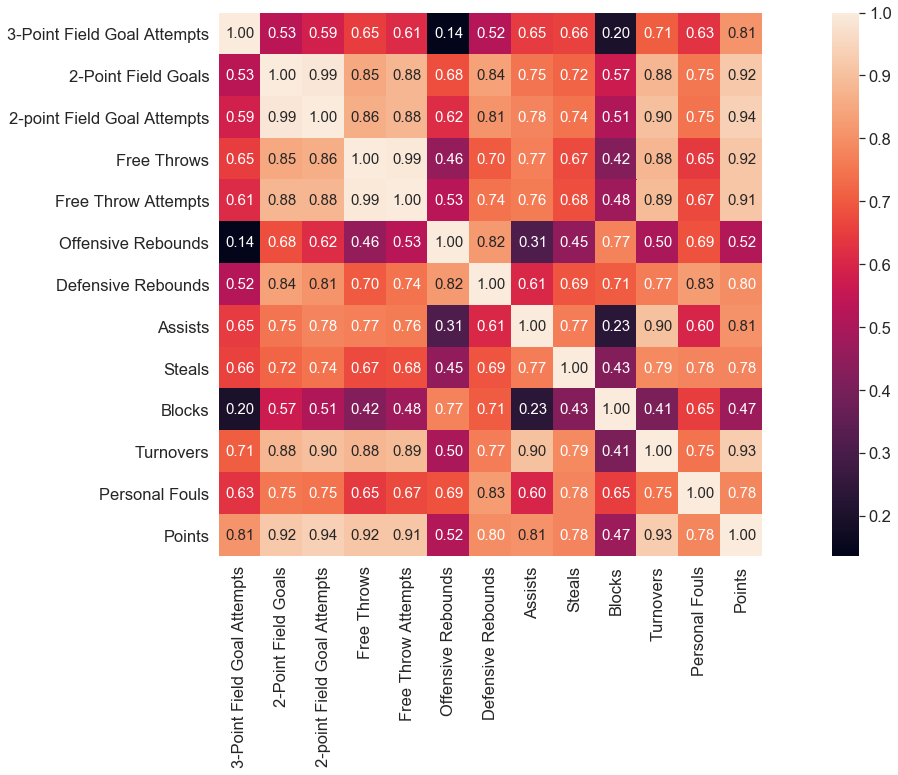

In [14]:
int_cols = player_stats.columns.values[1:]

#correlation
plt.figure(figsize=(25,10))
cm = np.corrcoef(player_stats[int_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=int_cols, xticklabels=int_cols)
plt.show()

3-Point Field Goals, 3-Point Field Goal Attempts, 2-Point Field goals, 2-Point Field Goal Attempts, Free Throws,Free throws, Free Throw Attempts, Offensive Rebounds, Defensive Rebounds, Assists, Steals, Turnovers, and Personal Fouls all have a moderate to high correlation with points. 3-Point Field Goals and 3-Point Field Goal Attempts have almost a perfect correlation.

# Build Model

In [15]:
X = player_stats[int_cols]

In [16]:
# Rescale data with StandardScalar
sc = preprocessing.StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[ 0.74205356,  1.28794365,  1.45452056, ...,  0.85525428,
         0.75735461,  1.08582182],
       [ 0.62931397,  0.29531563,  0.59274805, ...,  0.632503  ,
         0.67280809,  0.45559551],
       [-0.02598489, -0.31224118, -0.35611849, ..., -0.20281432,
        -0.03738267, -0.21003676],
       ...,
       [-0.90676294, -0.92835512, -0.93827332, ..., -0.96388121,
        -1.28867114, -1.00549094],
       [-0.82925447,  0.79162964,  0.61108364, ...,  0.09418739,
        -0.6461176 ,  0.25024087],
       [-0.92085539, -0.90268371, -0.93827332, ..., -0.926756  ,
        -1.18721532, -0.99604935]])

In [17]:
# Apply KMeans model to data
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
player_stats['cluster'] = kmeans.predict(X_std)
player_stats.head()

,3-Point Field Goals,3-Point Field Goal Attempts,2-Point Field Goals,2-point Field Goal Attempts,Free Throws,Free Throw Attempts,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,cluster
Player,,,,,,,,,,,,,,,
Aaron Gordon,73.0,237.0,262.0,530.0,151.0,224.0,107.0,368.0,228.0,51.0,39.0,100.0,125.0,894.0,0
Aaron Holiday,87.0,221.0,146.0,342.0,74.0,87.0,22.0,134.0,225.0,55.0,16.0,88.0,120.0,627.0,0
Abdel Nader,48.0,128.0,75.0,135.0,51.0,66.0,14.0,86.0,38.0,23.0,20.0,43.0,78.0,345.0,3
Adam Mokoka,6.0,15.0,6.0,13.0,2.0,4.0,7.0,3.0,4.0,4.0,0.0,2.0,17.0,32.0,1
Admiral Schofield,19.0,61.0,16.0,31.0,10.0,15.0,7.0,40.0,15.0,8.0,4.0,7.0,50.0,99.0,1


In [19]:
player_stats.columns

Index(['3-Point Field Goals', '3-Point Field Goal Attempts',
       '2-Point Field Goals', '2-point Field Goal Attempts', 'Free Throws',
       'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points',
       'cluster'],
      dtype='object')

Text(0.5, 1.0, 'Stats by cluster')

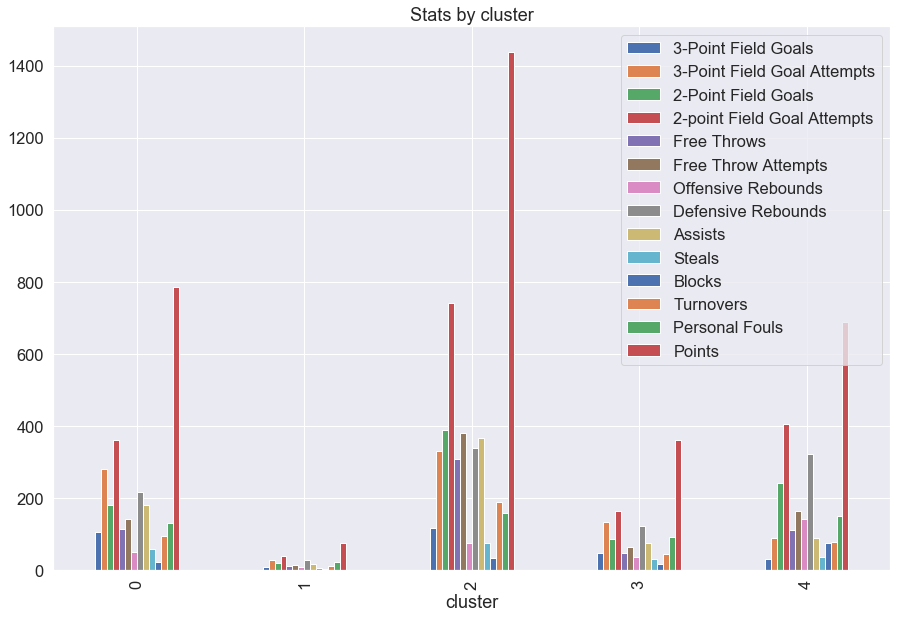

In [20]:
# Visualize the stats by cluster
data_plot = player_stats[['3-Point Field Goals', '3-Point Field Goal Attempts',
       '2-Point Field Goals', '2-point Field Goal Attempts', 'Free Throws',
       'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points',
       'cluster']]
data_plot.groupby("cluster").aggregate("mean").plot.bar(figsize=(15,10))
plt.title("Stats by cluster")

In [21]:
player_stats_2 = player_stats[player_stats['cluster'] == 2].sort_values('Points', ascending=False)
player_stats_2

,3-Point Field Goals,3-Point Field Goal Attempts,2-Point Field Goals,2-point Field Goal Attempts,Free Throws,Free Throw Attempts,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,cluster
Player,,,,,,,,,,,,,,,
James Harden,299.0,843.0,373.0,671.0,692.0,800.0,70.0,376.0,512.0,125.0,60.0,308.0,227.0,2335.0,2
Damian Lillard,270.0,674.0,354.0,675.0,460.0,518.0,33.0,251.0,530.0,70.0,22.0,194.0,114.0,1978.0,2
Devin Booker,141.0,398.0,486.0,885.0,468.0,509.0,29.0,268.0,456.0,49.0,18.0,264.0,213.0,1863.0,2
Giannis Antetokounmpo,89.0,293.0,596.0,945.0,398.0,629.0,140.0,716.0,354.0,61.0,66.0,230.0,195.0,1857.0,2
Trae Young,205.0,568.0,341.0,681.0,481.0,559.0,32.0,223.0,560.0,65.0,8.0,289.0,104.0,1778.0,2
Luka Dončić,171.0,541.0,410.0,714.0,426.0,562.0,78.0,495.0,538.0,62.0,14.0,260.0,153.0,1759.0,2
Bradley Beal,170.0,481.0,423.0,822.0,385.0,457.0,52.0,190.0,347.0,71.0,23.0,194.0,126.0,1741.0,2
LeBron James,148.0,425.0,495.0,878.0,264.0,381.0,66.0,459.0,684.0,78.0,36.0,261.0,118.0,1698.0,2
Donovan Mitchell,173.0,473.0,429.0,869.0,278.0,322.0,53.0,251.0,294.0,70.0,14.0,184.0,172.0,1655.0,2


Cluster 2 seems to be the best players overall. It has players like James Harden, Giannis Antetokounmpo, and Lebron James. 

In [22]:
player_stats_0 = player_stats[player_stats['cluster'] == 0].sort_values('Points', ascending=False)
player_stats_0[0:20]

,3-Point Field Goals,3-Point Field Goal Attempts,2-Point Field Goals,2-point Field Goal Attempts,Free Throws,Free Throw Attempts,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,cluster
Player,,,,,,,,,,,,,,,
Buddy Hield,271.0,688.0,227.0,474.0,115.0,136.0,57.0,271.0,213.0,66.0,17.0,168.0,165.0,1382.0,0
T.J. Warren,91.0,226.0,443.0,771.0,167.0,204.0,68.0,212.0,99.0,78.0,34.0,84.0,187.0,1326.0,0
Bojan Bogdanović,189.0,457.0,229.0,478.0,250.0,277.0,39.0,220.0,131.0,34.0,7.0,159.0,110.0,1275.0,0
Dennis Schröder,125.0,325.0,328.0,640.0,198.0,236.0,19.0,217.0,262.0,45.0,14.0,166.0,146.0,1229.0,0
Evan Fournier,173.0,434.0,261.0,495.0,180.0,220.0,18.0,153.0,209.0,71.0,15.0,125.0,161.0,1221.0,0
Dillon Brooks,147.0,411.0,288.0,657.0,164.0,203.0,68.0,175.0,150.0,63.0,27.0,124.0,278.0,1181.0,0
Danilo Gallinari,178.0,439.0,180.0,378.0,266.0,298.0,34.0,288.0,119.0,42.0,5.0,76.0,75.0,1160.0,0
Jaylen Brown,129.0,338.0,298.0,549.0,176.0,243.0,62.0,302.0,118.0,65.0,20.0,125.0,167.0,1159.0,0
Kemba Walker,180.0,473.0,198.0,416.0,209.0,242.0,36.0,181.0,268.0,48.0,28.0,117.0,91.0,1145.0,0


Cluster 0 seems to be players that are more offensively minded. They score their points off of a mix of 2-Point Field Goals and 3-Point Field Goals. This cluster includes players like Dennis Schröder, Kemba Walker, and Paul George.

In [23]:
player_stats_4 = player_stats[player_stats['cluster'] == 4].sort_values('Defensive Rebounds', ascending=False)
player_stats_4[0:20]

,3-Point Field Goals,3-Point Field Goal Attempts,2-Point Field Goals,2-point Field Goal Attempts,Free Throws,Free Throw Attempts,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,cluster
Player,,,,,,,,,,,,,,,
Rudy Gobert,0.000000,0.000000,386.000000,557.000000,254.000000,403.0,230.000000,686.000000,101.000000,51.000000,135.0,130.000000,215.0,1026.000000,4
Hassan Whiteside,4.000000,7.000000,432.000000,695.000000,164.000000,239.0,258.000000,647.000000,78.000000,26.000000,196.0,120.000000,196.0,1040.000000,4
Jonas Valančiūnas,32.000000,91.000000,400.000000,648.000000,148.000000,200.0,213.000000,575.000000,131.000000,30.000000,76.0,127.000000,185.0,1044.000000,4
Nikola Vučević,98.000000,289.000000,395.000000,744.000000,131.000000,167.0,140.000000,533.000000,222.000000,54.000000,47.0,88.000000,135.0,1215.000000,4
Jarrett Allen,0.000000,6.000000,302.000000,459.000000,171.000000,270.0,216.000000,455.000000,110.000000,40.000000,92.0,77.000000,162.0,775.000000,4
Kristaps Porziņģis,142.000000,403.000000,256.000000,529.000000,226.000000,283.0,100.000000,440.000000,102.000000,41.000000,115.0,92.000000,185.0,1164.000000,4
DeAndre Jordan,0.000000,0.000000,191.000000,287.000000,83.000000,122.0,141.000000,420.000000,105.000000,18.000000,52.0,74.000000,114.0,465.000000,4
Andre Drummond,3.333333,23.333333,275.333333,499.333333,112.666667,196.0,166.666667,409.333333,101.333333,72.666667,62.0,135.333333,134.0,673.333333,4
Steven Adams,1.000000,3.000000,282.000000,475.000000,117.000000,201.0,207.000000,376.000000,146.000000,51.000000,67.0,94.000000,122.0,684.000000,4


Cluster 4 appears to be players that are more defensively minded (lots of defensive rebounds, offensive rebounds, and highest number of blocks compared to all the other clusters). They also tend to score their points off 3_point Field Goals and have very low 2-Point Field Goals made. This cluster includes players like Kristaps Porziņģis, Tristen Tompson, and Dwight Howard. 

Cluster 1 appears to be the "bench warmers" and cluster 3 is like cluster 0 but on average is about twice as bad as scoring points as cluster 0.